<a href="https://colab.research.google.com/github/suniljaggi16fsm/DeepLearning/blob/main/Project1_GooglePlayApps_DLNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Overview:
The dataset contains information about various apps available on the Google Play Store. The columns in the dataset include:

App: The name of the app.

Category: The category the app belongs to (e.g., 'BUSINESS', 'GAME', etc.).

Rating: The user rating of the app (from 1 to 5).

Reviews: The number of user reviews for the app.

Size: The size of the app.

Installs: The number of times the app has been installed.

Type: Whether the app is 'Free' or 'Paid'.

Price: The price of the app.

Content Rating: The target audience for the app (e.g., 'Everyone', 'Teen', etc.).

Genres: The genre(s) of the app.

Last Updated: The date when the app was last updated.

Current Ver: The current version of the app.

Android Ver: The minimum Android version required to run the app.

##Project Overview
In this project, various deep learning concepts were employed to analyze the Google Play Store apps dataset. The dataset was preprocessed by handling missing values, converting categorical variables into numerical representations using techniques like one-hot encoding, and scaling numerical features. Neural networks were then utilized for tasks such as predicting app prices and app ratings, with the data split into training and testing sets. The models' performances were evaluated using mean squared error and other relevant metrics, providing insights into the relationships between app features and their prices or ratings.

##Objectives:

1. To perform data cleaning and preprocessing.
2. To perform Exploratory data analysis.
3. To perform Time-series forcasting using normalized feature
4. To perform regression using Random Forest Regressor and Gradient Boosting Regressor
5. To implement Multi Neural network on Google Play Apps.
6. To implement multi network neural network with dropout.
7. To implement Multilayer NN using dropout and normalization.
8. To implement ANN using dropout and Adam optimizer.
9. To implement ANN using dropout and batch normalization.
10. To implement and explore fastasi features for tabular data.
11. To implement neural netoworks using auto-encoders.
12. To implement CNN using pseudo-image.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# 1.0.2
# Simplify file path handling
from pathlib import Path

In [ ]:
# 1.1 Mount Google Drive for data access
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.2.1 Where is our data:

pathToFolder = "/gdrive/MyDrive/DLNLP_Projects_Datasets"

In [ ]:
# 1.2.2 specific path to the FIFA22 dataset file

path = Path(pathToFolder) / "googleplaystore.csv"

In [ ]:
# 2.1 Load the data
df = pd.read_csv(path)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print("Shape:", df.shape)
print("Columns:", df.columns)
print("\nData Info:")
df.info()

Dataset Overview:
Shape: (10841, 13)
Columns: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  And

In [ ]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Figure size 800x500 with 0 Axes>

<Axes: >

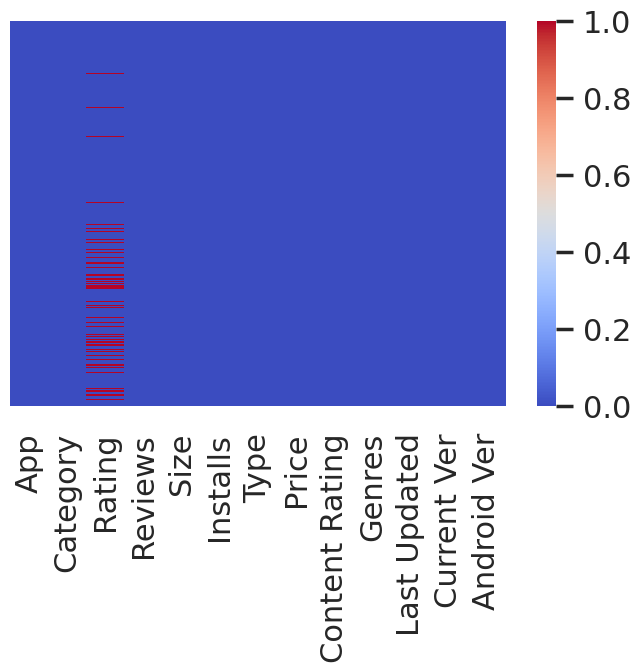

In [ ]:
# Heatmap for missing values in training data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cmap="coolwarm", yticklabels=False, cbar=True)
plt.show()
# The darker the cell, the more missing values there are in that column.
#few columns with a lot of missing values,
#need to be dealt with before the data can be used for machine learning tasks.

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

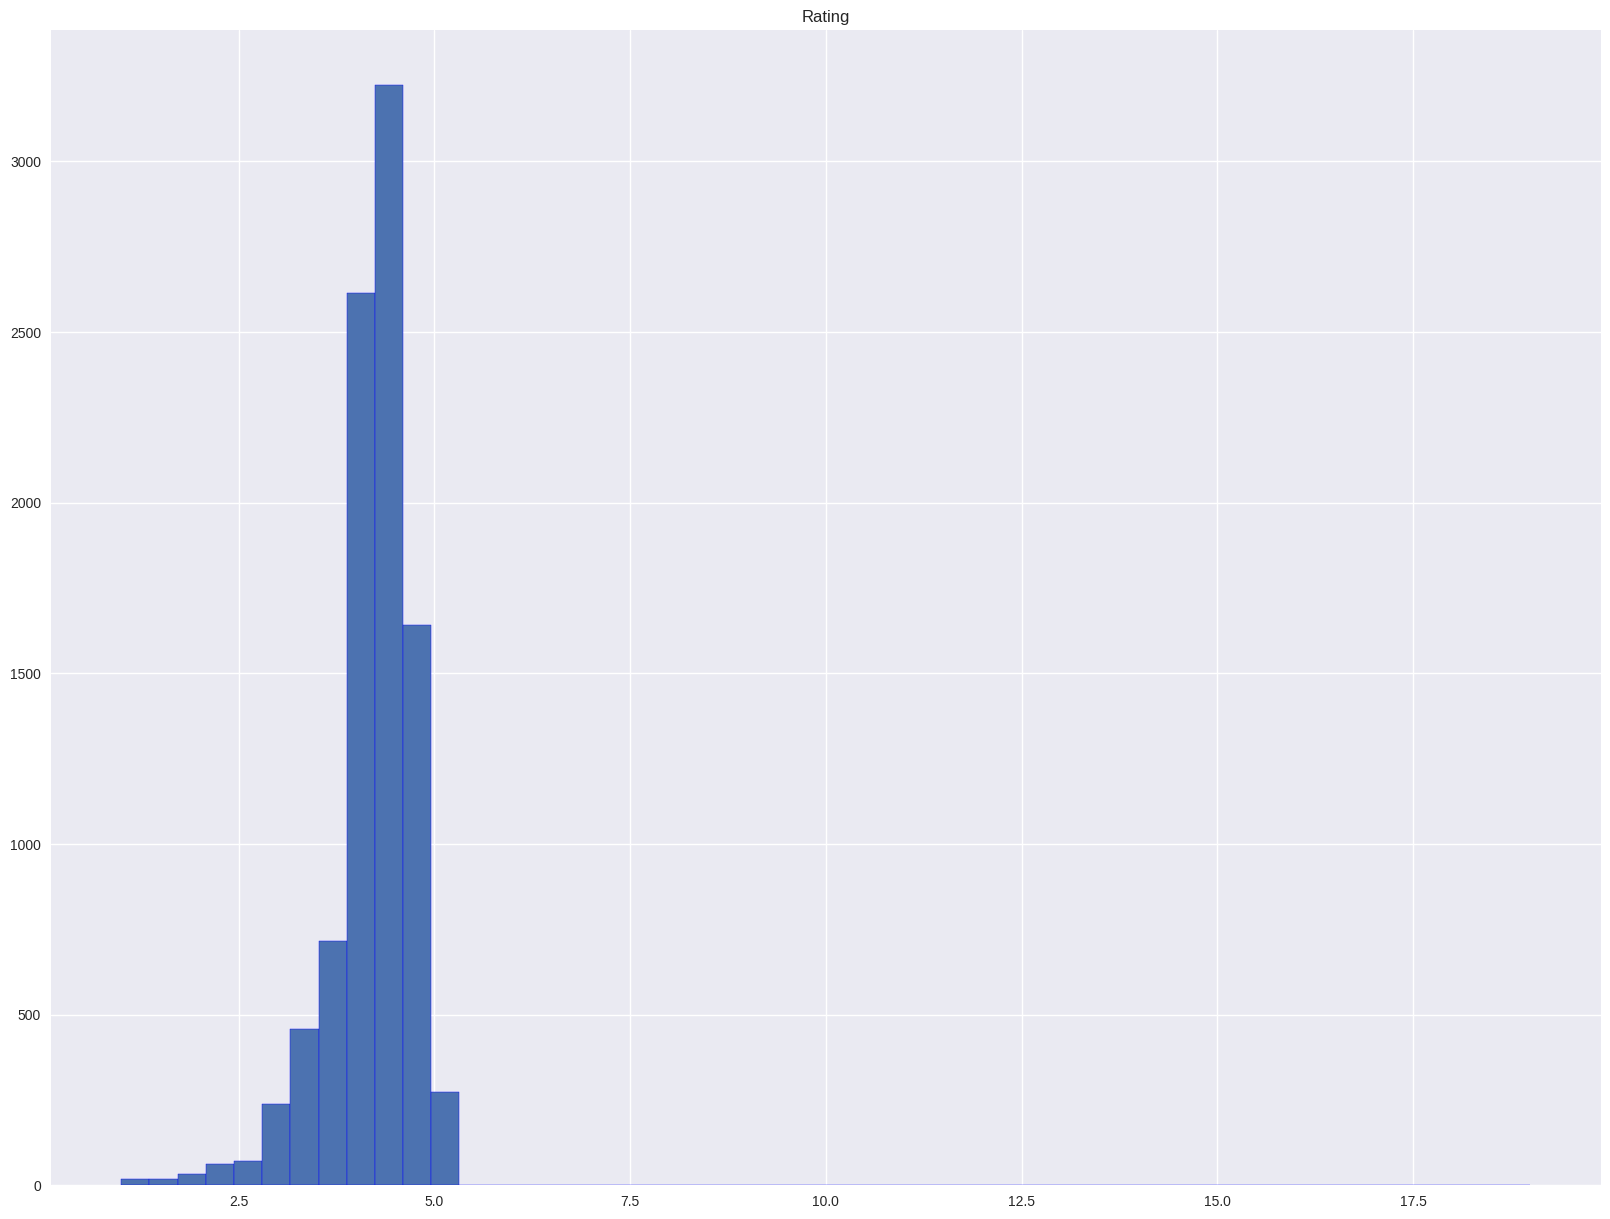

In [ ]:
# PLot density plot for all features
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [ ]:
# Percentage of data missing
round(df.isnull().mean() * 100,2)


App                0.00
Category           0.00
Rating            13.60
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['Reviews'].str.isnumeric().sum()

10840

In [ ]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_copy=df.copy()

In [ ]:
df_copy=df_copy.drop(df_copy.index[10472])

In [ ]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
## Convert Review Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


Objective 1: Data Cleaning and Pre-processing

In [ ]:
import pandas as pd

# Assuming df_copy is your DataFrame containing the dataset
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.strip('M')) * 1000
        elif 'k' in size:
            return float(size.strip('k'))
    return size

df_copy['Size'] = df_copy['Size'].apply(convert_size)



In [ ]:
df_copy['Size'].unique()

array([19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0,
       33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0,
       2700.0, 5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 7000.0, 23000.0,
       6000.0, 6100.0, 4600.0, 9200.0, 5200.0, 11000.0, 24000.0,
       'Varies with device', 9400.0, 15000.0, 10000.0, 1200.0, 26000.0,
       8000.0, 7900.0, 56000.0, 57000.0, 35000.0, 54000.0, 201.0, 3600.0,
       5700.0, 8600.0, 2400.0, 27000.0, 2500.0, 16000.0, 3400.0, 8900.0,
       3900.0, 2900.0, 38000.0, 32000.0, 5400.0, 18000.0, 1100.0, 2200.0,
       4500.0, 9800.0, 52000.0, 9000.0, 6700.0, 30000.0, 2600.0, 7100.0,
       3700.0, 22000.0, 7400.0, 6400.0, 3200.0, 8200.0, 9900.0, 4900.0,
       9500.0, 5000.0, 5900.0, 13000.0, 73000.0, 6800.0, 3500.0, 4000.0,
       2300.0, 7200.0, 2100.0, 42000.0, 7300.0, 9100.0, 55000.0, 23.0,
       6500.0, 1500.0, 7500.0, 51000.0, 41000.0, 48000.0, 8500.0, 46000.0,
       8300.0, 4300.0, 4700.0, 3300.0, 40000.0, 7800.0, 8800.0, 660

In [ ]:
df_copy['Size'].isnull().sum()

0

In [ ]:
df_copy['Size']

0                   19000.0
1                   14000.0
2                    8700.0
3                   25000.0
4                    2800.0
                ...        
10836               53000.0
10837                3600.0
10838                9500.0
10839    Varies with device
10840               19000.0
Name: Size, Length: 10840, dtype: object

In [ ]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [ ]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [ ]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [ ]:
#data is now clean

Objective 2: To perform exploratory data analysis

In [ ]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [ ]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

In [ ]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [ ]:
df_copy.shape

(9659, 16)

In [ ]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 8 categorical features : ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [ ]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: App, Length: 9660, dtype: float64
---------------------------
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
COMMUNIC

<Figure size 1500x1500 with 0 Axes>

Text(0.5, 1.0, 'Univariate Analysis of Numerical Features')

<Axes: >

<Axes: xlabel='Rating', ylabel='Density'>

Text(0.5, 0, 'Rating')

<Axes: >

<Axes: xlabel='Reviews', ylabel='Density'>

Text(0.5, 0, 'Reviews')

<Axes: >

<Axes: xlabel='Installs', ylabel='Density'>

Text(0.5, 0, 'Installs')

<Axes: >

<Axes: xlabel='Price', ylabel='Density'>

Text(0.5, 0, 'Price')

<Axes: >

<Axes: xlabel='Last Updated', ylabel='Density'>

Text(0.5, 0, 'Last Updated')

<Axes: >

<Axes: xlabel='Day', ylabel='Density'>

Text(0.5, 0, 'Day')

<Axes: >

<Axes: xlabel='Month', ylabel='Density'>

Text(0.5, 0, 'Month')

<Axes: >

<Axes: xlabel='Year', ylabel='Density'>

Text(0.5, 0, 'Year')

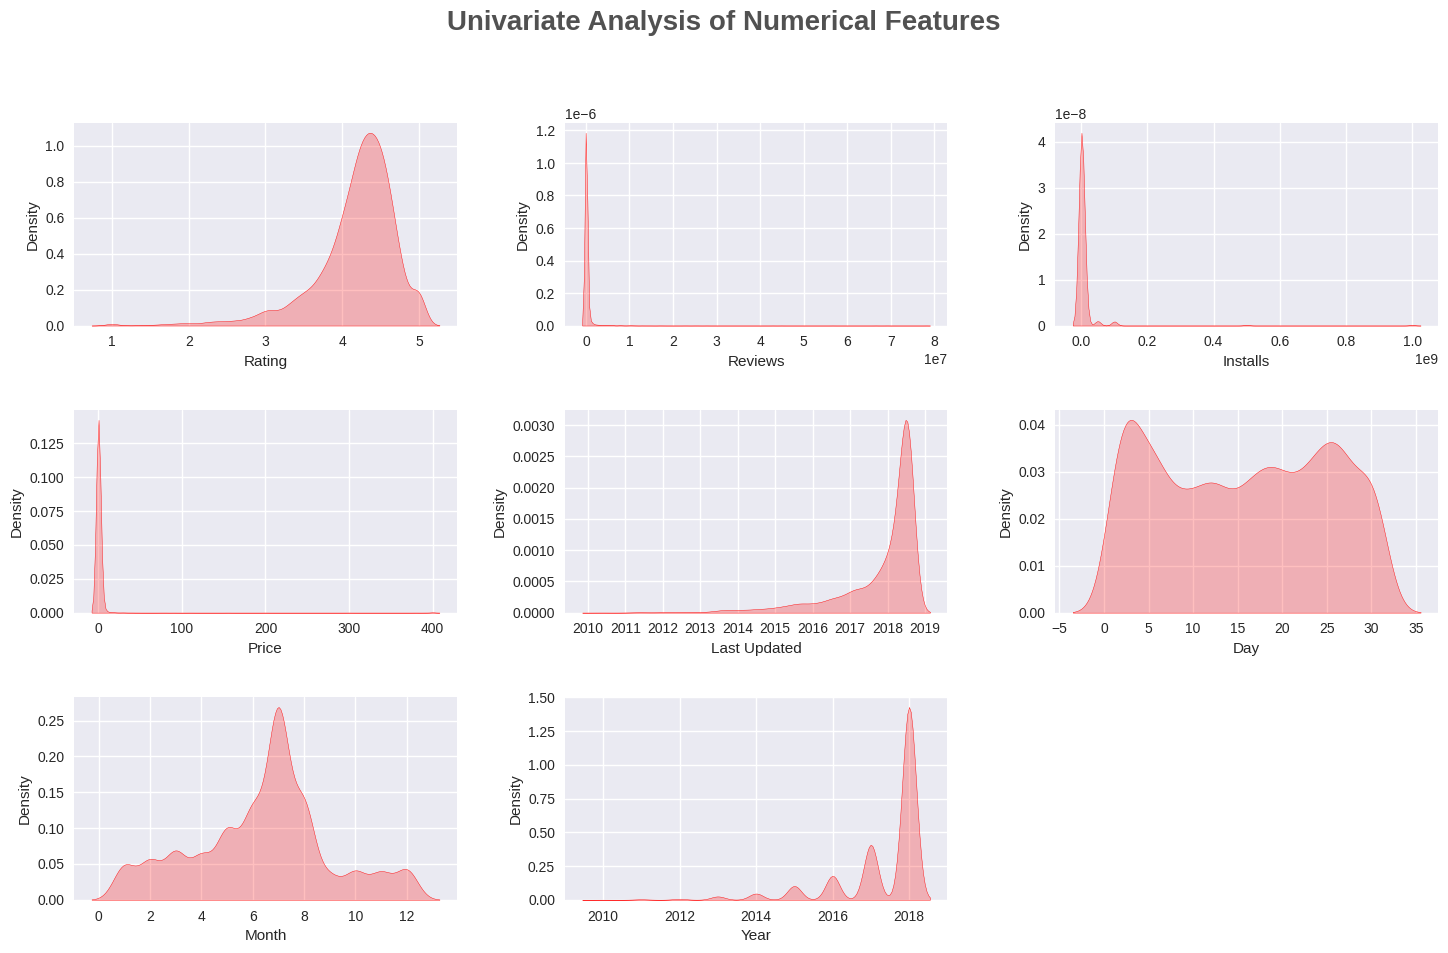

In [ ]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Univariate Analysis of Categorical Features')

<Axes: >

<Axes: xlabel='Type', ylabel='count'>

Text(0.5, 0, 'Type')

(array([0, 1, 2]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid'), Text(2, 0, '0')])

<Axes: >

<Axes: xlabel='Content Rating', ylabel='count'>

Text(0.5, 0, 'Content Rating')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

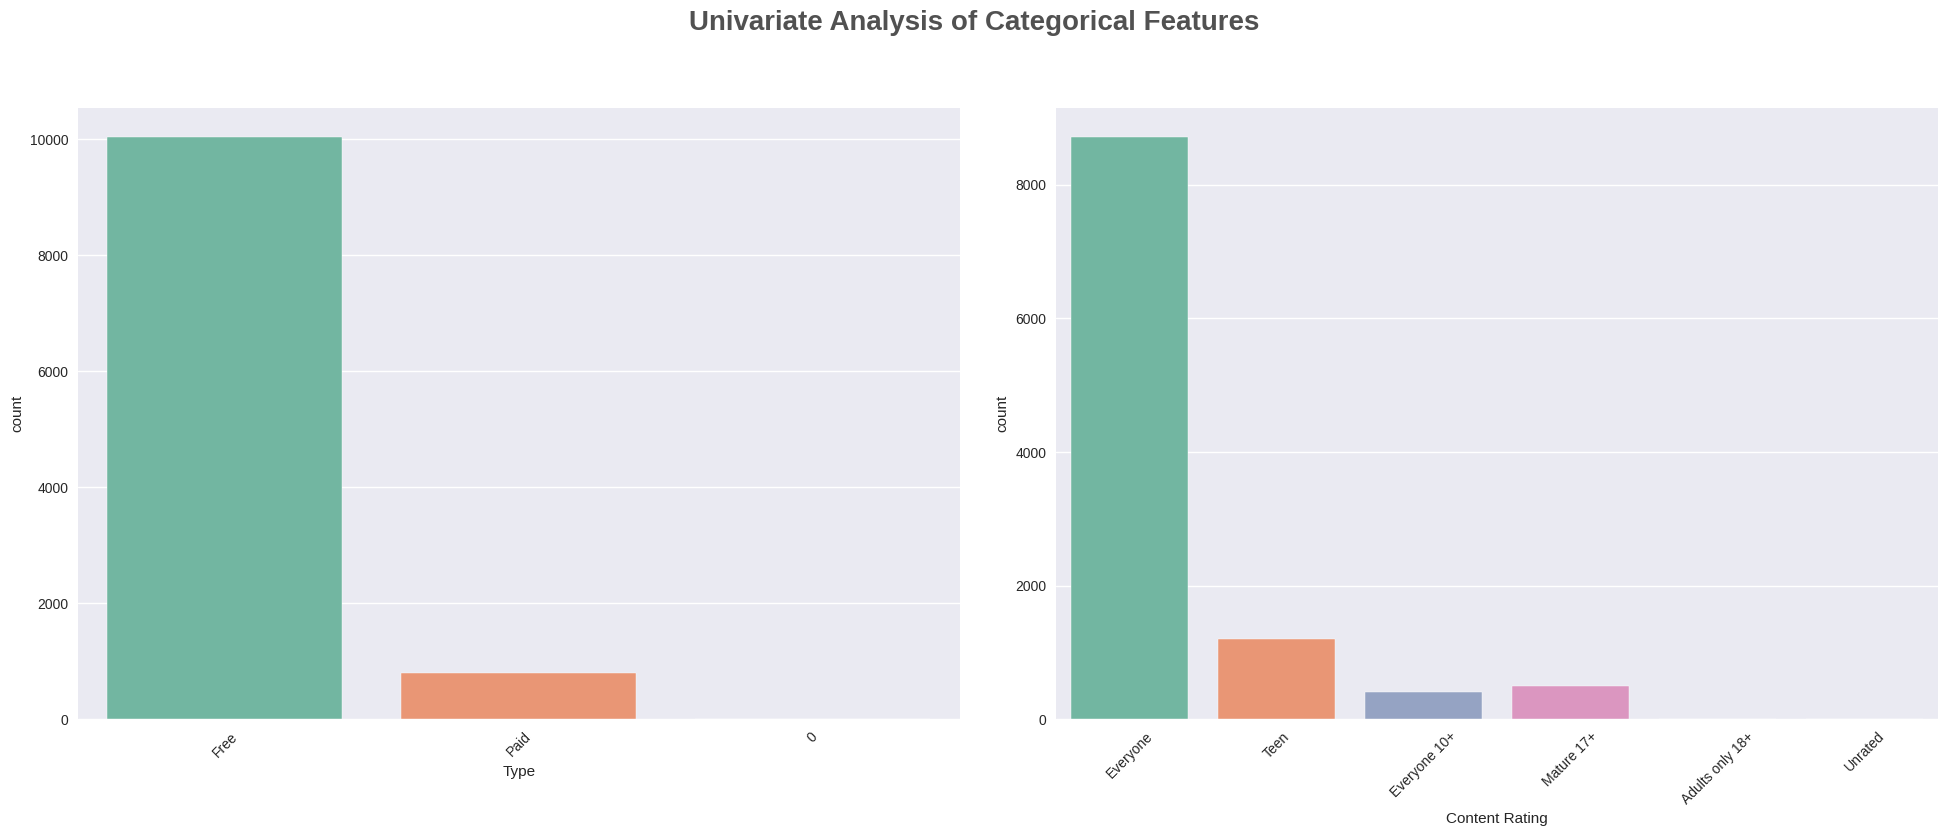

In [ ]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [ ]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='Category'>

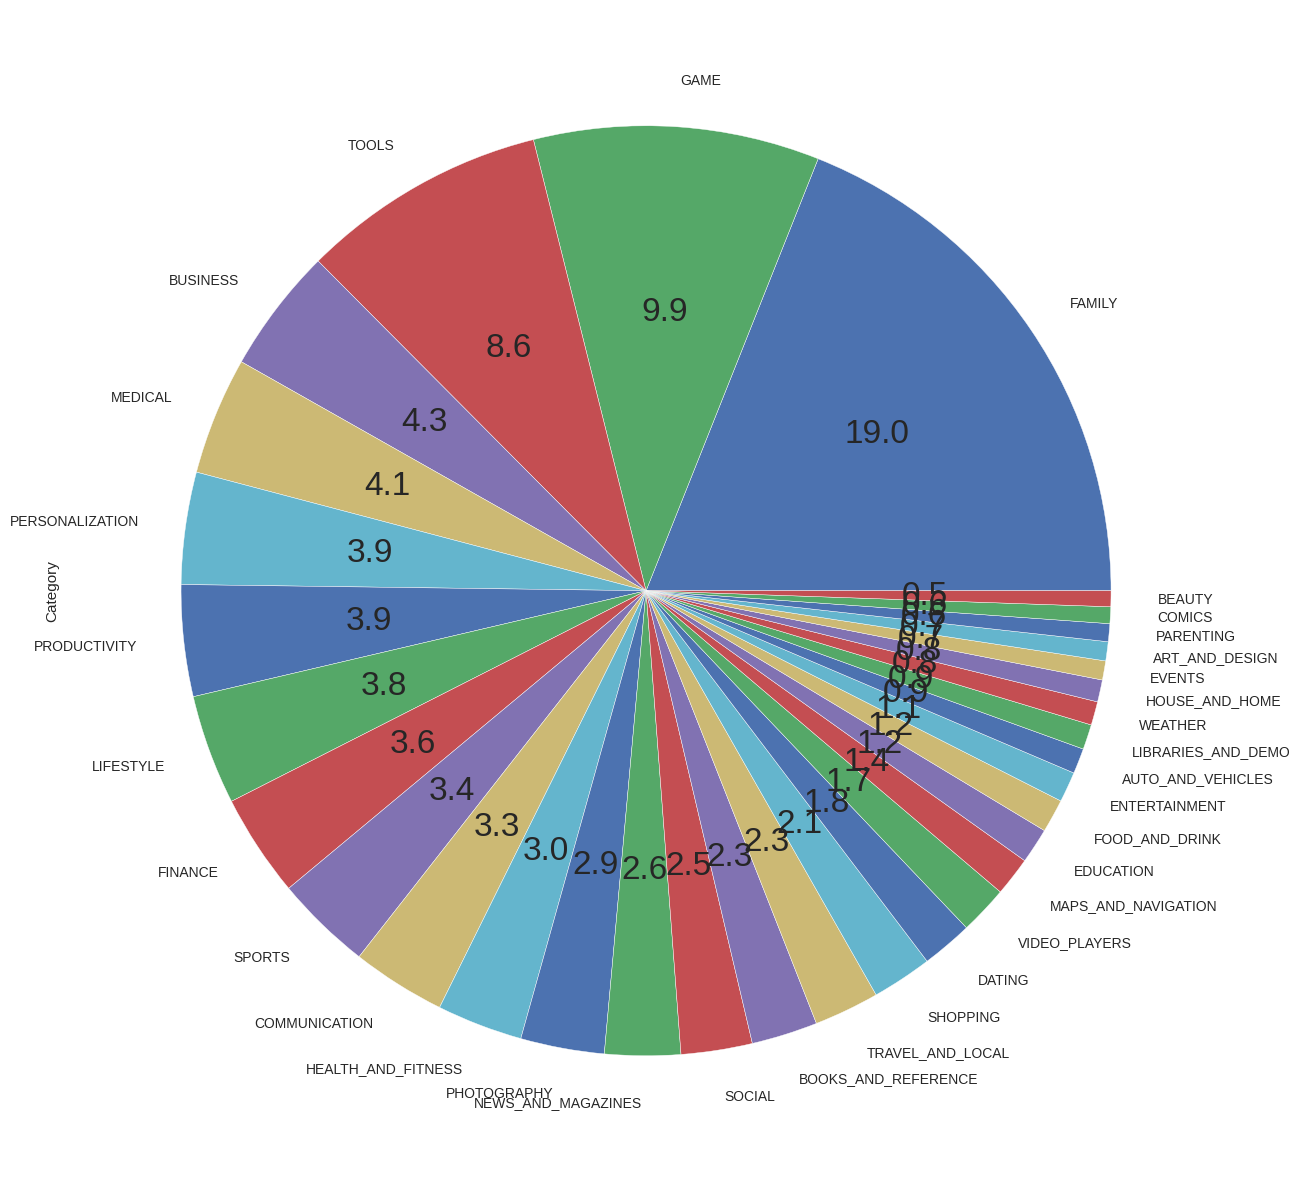

In [ ]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

In [ ]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [ ]:
category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


<Figure size 1500x600 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Top 10 App categories')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'BUSINESS'),
  Text(4, 0, 'MEDICAL'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'PRODUCTIVITY'),
  Text(7, 0, 'LIFESTYLE'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'SPORTS')])

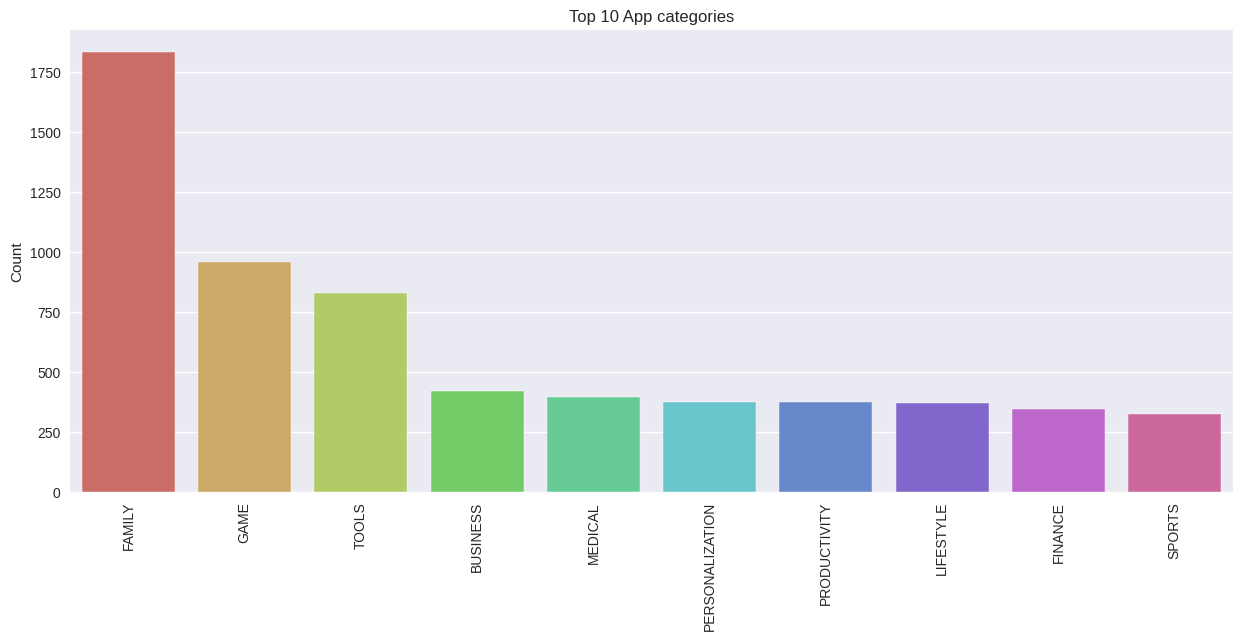

In [ ]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

<Figure size 4000x3000 with 0 Axes>

<Axes: >

<Axes: xlabel='Installs', ylabel='App'>

Text(0.5, 0, 'Installation in Millions')

Text(0, 0.5, '')

Text(0.5, 1.0, 'GAME')

<Axes: >

<Axes: xlabel='Installs', ylabel='App'>

Text(0.5, 0, 'Installation in Millions')

Text(0, 0.5, '')

Text(0.5, 1.0, 'COMMUNICATION')

<Axes: >

<Axes: xlabel='Installs', ylabel='App'>

Text(0.5, 0, 'Installation in Millions')

Text(0, 0.5, '')

Text(0.5, 1.0, 'PRODUCTIVITY')

<Axes: >

<Axes: xlabel='Installs', ylabel='App'>

Text(0.5, 0, 'Installation in Millions')

Text(0, 0.5, '')

Text(0.5, 1.0, 'SOCIAL')

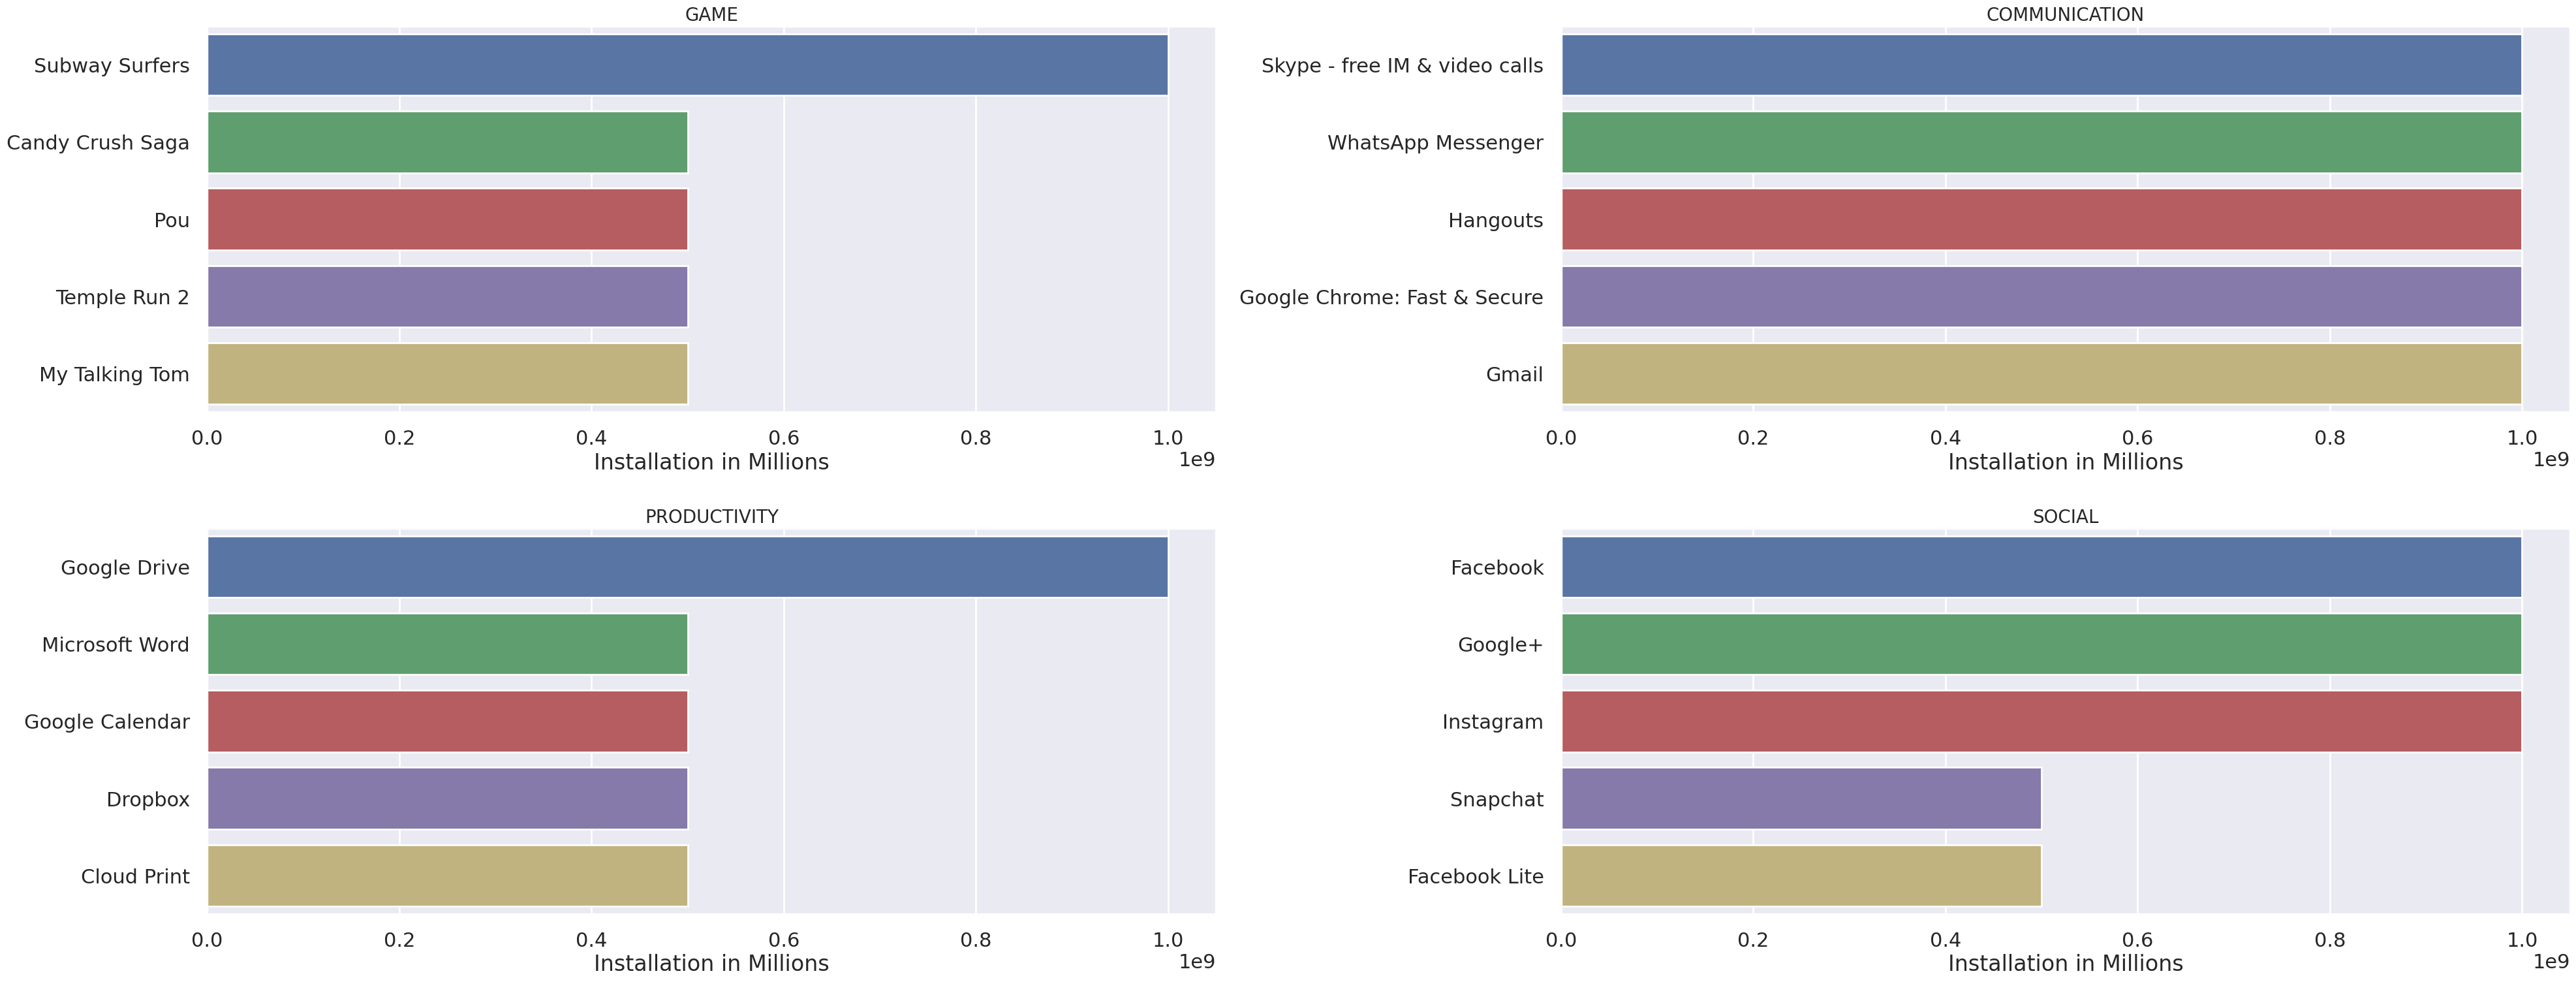

In [ ]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [ ]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


In [ ]:
#EDA DONE

Deep Learning Implementation

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   object        
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int64         
 14  Month           9659 non-null   int64         
 15  Yea

<Axes: >

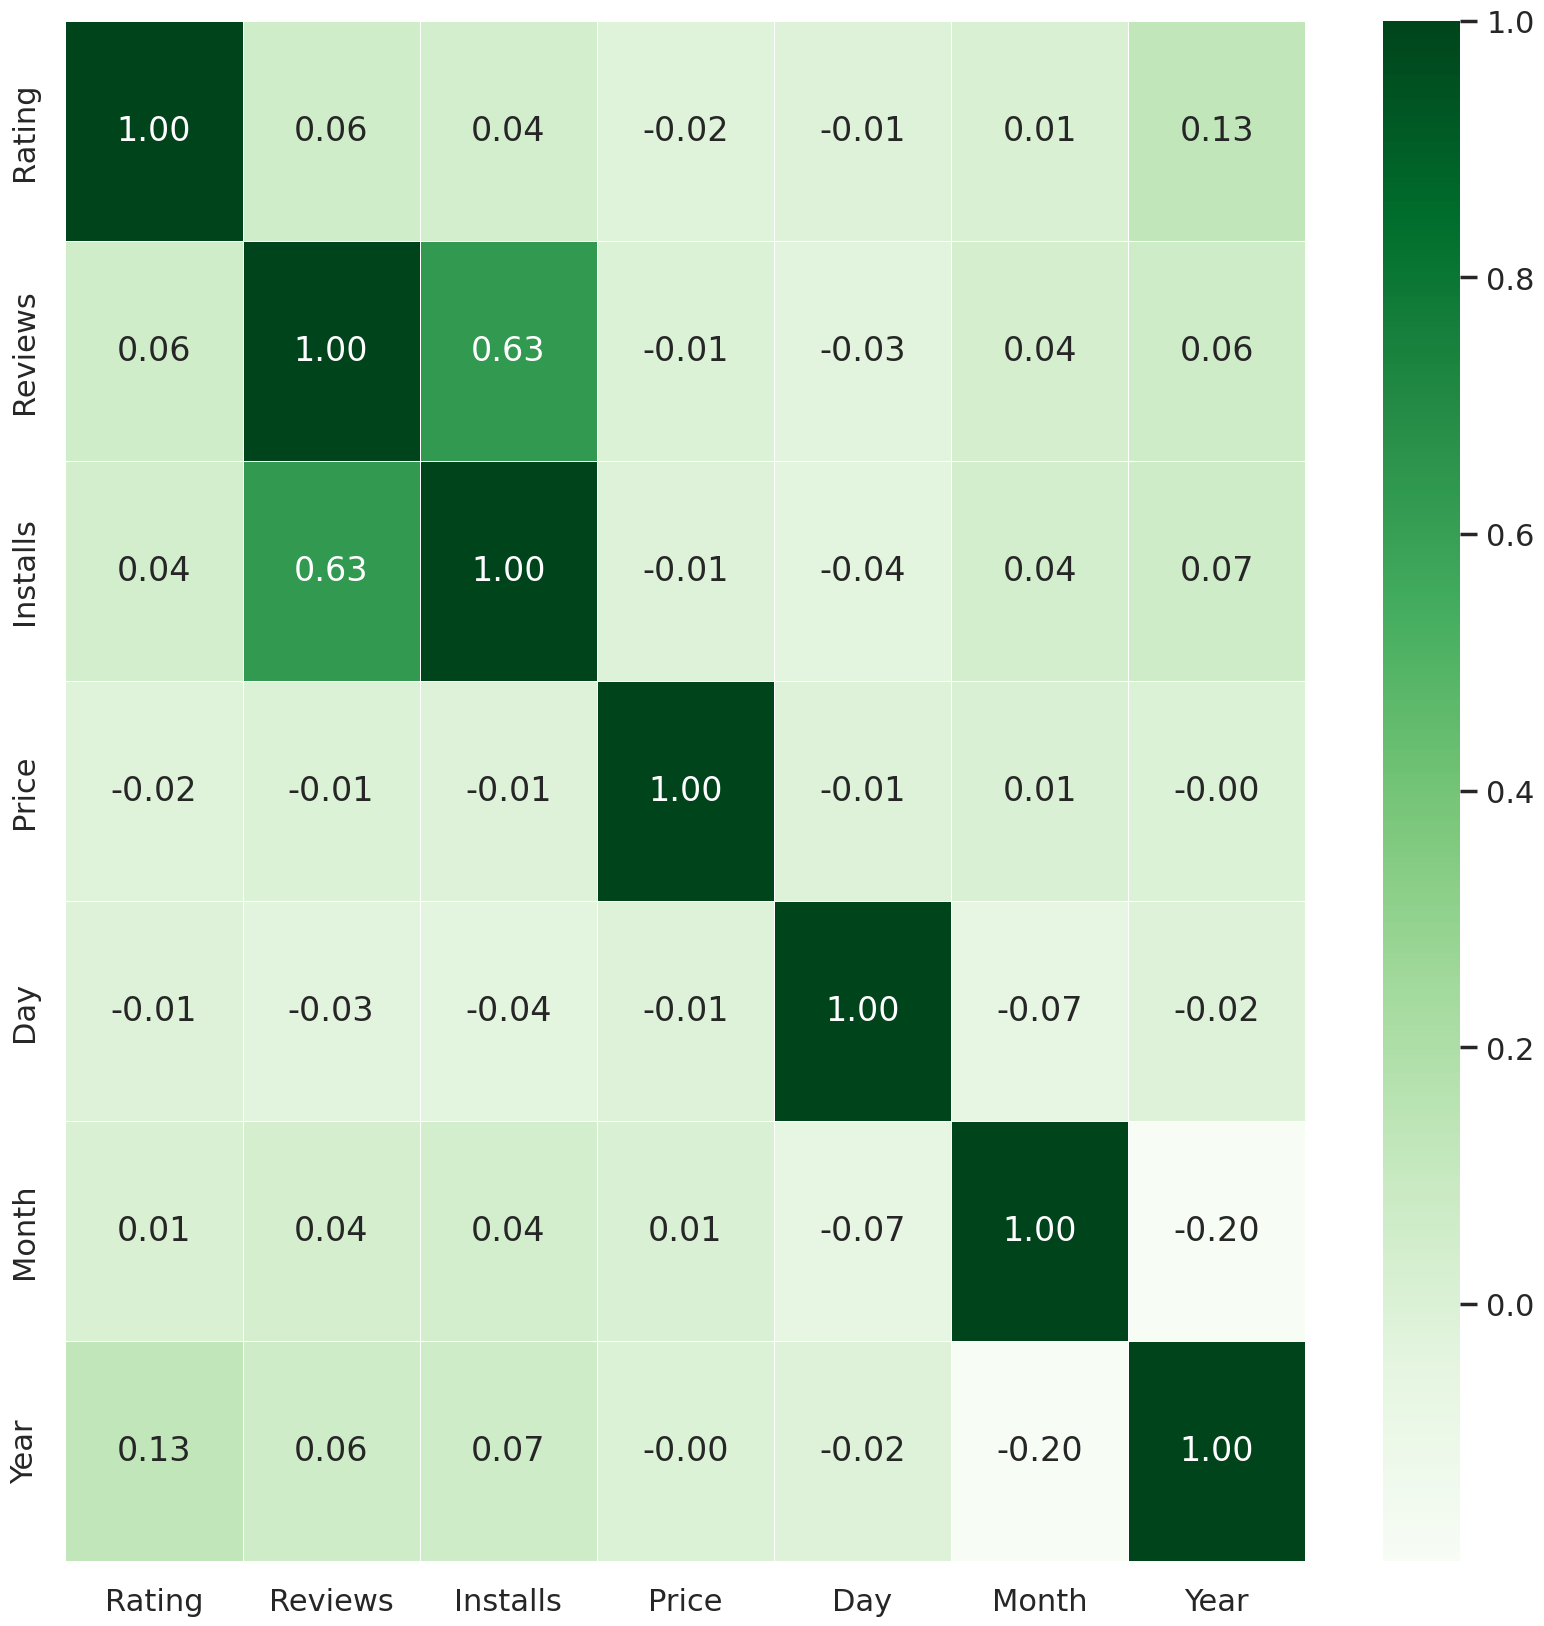

In [ ]:
# Correlation
#heatmap of the correlation between the features in the GooglePlayApps dataset.
fig, ax = plt.subplots(figsize=(20, 20))  # Increase the figsize
sns.heatmap(df_copy.corr(), annot=True, cmap='Greens', linewidths=.50, fmt='.2f', ax=ax)
plt.show()
#The darker the cell, the stronger the correlation between the two features.

In [ ]:
#counting number of missing values
missing_values = df_copy.isnull().sum()  # Count missing values for each column
print("Missing Values:\n", missing_values)

Missing Values:
 App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Load your dataset into the 'data' DataFrame
# Assuming you have already loaded the dataset

# Fill missing values in 'Rating' column with median
median_rating = df_copy['Rating'].median()
df_copy['Rating'].fillna(median_rating, inplace=True)

# Fill missing values in 'Type' column with the most frequent value (mode)
most_common_type = df_copy['Type'].mode()[0]
df_copy['Type'].fillna(most_common_type, inplace=True)

# Fill missing values in 'Current Ver' and 'Android Ver' columns with placeholders
df_copy['Current Ver'].fillna('Unknown', inplace=True)
df_copy['Android Ver'].fillna('Unknown', inplace=True)

# Assuming df_copy is your preprocessed DataFrame containing the dataset
df_copy['Datetime'] = pd.to_datetime(df_copy[['Year', 'Month', 'Day']])
df_copy = df_copy.sort_values('Datetime')

# Normalize the column you want to analyze (e.g., 'Rating')
scaler = StandardScaler()
df_copy['NormalizedRating'] = scaler.fit_transform(df_copy['Rating'].values.reshape(-1, 1))

# Fill missing values in 'NormalizedRating' column with 0
df_copy['NormalizedRating'].fillna(0, inplace=True)

# Display remaining missing values
remaining_missing_values = df_copy.isnull().sum()
print("Remaining Missing Values:\n", remaining_missing_values)


Remaining Missing Values:
 App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
Day                 0
Month               0
Year                0
Datetime            0
NormalizedRating    0
dtype: int64


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 7479 to 10712
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App               9659 non-null   object        
 1   Category          9659 non-null   object        
 2   Rating            9659 non-null   float64       
 3   Reviews           9659 non-null   int64         
 4   Size              9659 non-null   object        
 5   Installs          9659 non-null   int64         
 6   Type              9659 non-null   object        
 7   Price             9659 non-null   float64       
 8   Content Rating    9659 non-null   object        
 9   Genres            9659 non-null   object        
 10  Last Updated      9659 non-null   datetime64[ns]
 11  Current Ver       9659 non-null   object        
 12  Android Ver       9659 non-null   object        
 13  Day               9659 non-null   int64         
 14  Month             96

Obejctive 3: To perform time-series forcasting using neural network

Epoch 1/50
483/483 - 3s - loss: 1.0807 - 3s/epoch - 7ms/step
Epoch 2/50
483/483 - 2s - loss: 1.0799 - 2s/epoch - 4ms/step
Epoch 3/50
483/483 - 2s - loss: 1.0792 - 2s/epoch - 4ms/step
Epoch 4/50
483/483 - 2s - loss: 1.0789 - 2s/epoch - 4ms/step
Epoch 5/50
483/483 - 2s - loss: 1.0781 - 2s/epoch - 5ms/step
Epoch 6/50
483/483 - 2s - loss: 1.0786 - 2s/epoch - 4ms/step
Epoch 7/50
483/483 - 2s - loss: 1.0777 - 2s/epoch - 4ms/step
Epoch 8/50
483/483 - 2s - loss: 1.0787 - 2s/epoch - 4ms/step
Epoch 9/50
483/483 - 2s - loss: 1.0774 - 2s/epoch - 4ms/step
Epoch 10/50
483/483 - 2s - loss: 1.0770 - 2s/epoch - 4ms/step
Epoch 11/50
483/483 - 2s - loss: 1.0769 - 2s/epoch - 5ms/step
Epoch 12/50
483/483 - 2s - loss: 1.0764 - 2s/epoch - 4ms/step
Epoch 13/50
483/483 - 2s - loss: 1.0758 - 2s/epoch - 4ms/step
Epoch 14/50
483/483 - 2s - loss: 1.0758 - 2s/epoch - 4ms/step
Epoch 15/50
483/483 - 2s - loss: 1.0753 - 2s/epoch - 4ms/step
Epoch 16/50
483/483 - 2s - loss: 1.0745 - 2s/epoch - 4ms/step
Epoch 17/50
483/4

Test loss: 0.6784
61/61 [==============================] - 1s 2ms/step


StandardScaler()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Rating')

(array([17737., 17739., 17741., 17743., 17744., 17746., 17748., 17750.]),
 [Text(17737.0, 0, '2018-07-25'),
  Text(17739.0, 0, '2018-07-27'),
  Text(17741.0, 0, '2018-07-29'),
  Text(17743.0, 0, '2018-07-31'),
  Text(17744.0, 0, '2018-08-01'),
  Text(17746.0, 0, '2018-08-03'),
  Text(17748.0, 0, '2018-08-05'),
  Text(17750.0, 0, '2018-08-07')])

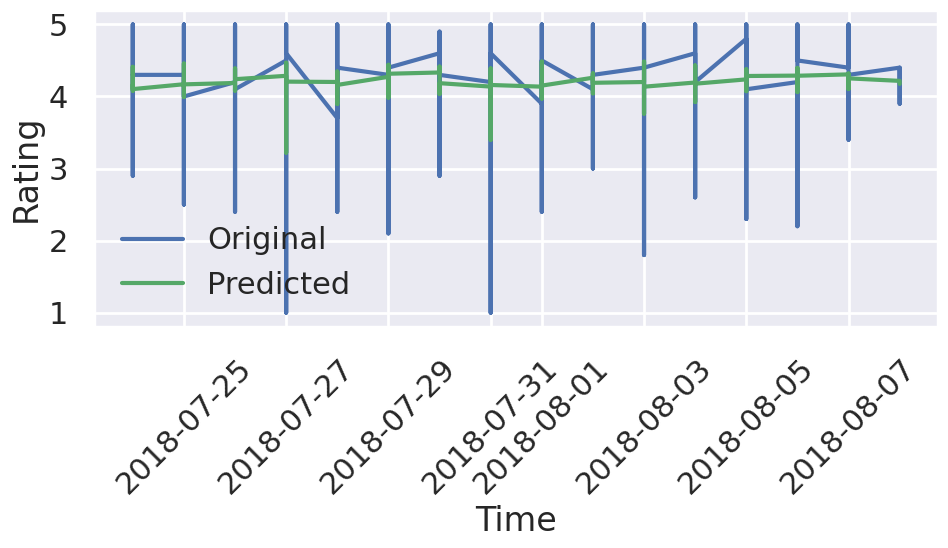

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense




# Split data into train and test sets
train_size = int(0.8 * len(df_copy))
train_data, test_data = df_copy[:train_size], df_copy[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10  # Adjust this value based on your dataset and task
X_train = create_sequences(train_data['NormalizedRating'].values, seq_length)
y_train = train_data['NormalizedRating'].values[seq_length:]

X_test = create_sequences(test_data['NormalizedRating'].values, seq_length)
y_test = test_data['NormalizedRating'].values[seq_length:]

# Build and train the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))  # Adjust output units based on your task
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}')

# Make predictions for future values
future_values = model.predict(X_test)

# Convert predictions back to original scale
scaler = StandardScaler()
scaler.fit(df_copy['Rating'].values.reshape(-1, 1))  # Fit scaler on original data
future_values = scaler.inverse_transform(future_values)

# Plot the original and predicted values
plt.figure(figsize=(10, 6))  # Increase the size of the plot
plt.plot(test_data['Datetime'][seq_length:], test_data['Rating'][seq_length:], label='Original')
plt.plot(test_data['Datetime'][seq_length:], future_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Rating')  # Adjust ylabel based on your dataset
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [ ]:
unique_sizes = df_copy['Size'].unique()
print(unique_sizes)


[209.0 116.0 73.0 4100.0 1100.0 2600.0 81.0 29.0 26.0 292.0 208.0 221.0
 93.0 39.0 13000.0 746.0 2100.0 624.0 51.0 1020.0 335.0 6400.0 2200.0
 2000.0 72.0 44.0 'Varies with device' 190.0 70.0 14000.0 6900.0 647.0
 1000.0 2700.0 192.0 8500.0 11000.0 785.0 899.0 9100.0 266.0 924.0 164.0
 288.0 11.0 5200.0 939.0 842.0 232.0 6100.0 186.0 14.0 353.0 963.0 881.0
 1900.0 642.0 15000.0 37000.0 5100.0 1300.0 45.0 1400.0 226.0 47000.0
 400.0 153.0 103.0 25000.0 33.0 19000.0 32000.0 986.0 2800.0 240.0 7600.0
 58.0 626.0 837.0 89.0 234.0 592.0 33000.0 4200.0 257.0 172.0 48000.0 20.0
 3500.0 655.0 775.0 196.0 778.0 43000.0 322.0 376.0 17.0 26000.0 201.0
 2900.0 749.0 720.0 318.0 259.0 754.0 3300.0 34000.0 597.0 10000.0 12000.0
 1200.0 9700.0 317.0 2300.0 4700.0 942.0 45000.0 91.0 38000.0 902.0 970.0
 5500.0 23000.0 50.0 108.0 97.0 44000.0 42000.0 20000.0 39000.0 498.0
 7000.0 582.0 1500.0 663.0 4900.0 245.0 4500.0 9500.0 24000.0 1800.0
 6700.0 903.0 383.0 619.0 3900.0 7500.0 5700.0 696.0 4600.0 880

In [ ]:
# Convert 'Size' column to numeric data type
df_copy['Size'] = pd.to_numeric(df_copy['Size'], errors='coerce')

# Drop any rows with missing values after converting to numeric
df_copy.dropna(subset=['Size'], inplace=True)


In [ ]:
# Drop irrelevant columns and columns with high cardinality
drop_columns = ['App']
df_copy = df_copy.drop(columns=drop_columns)

Objective 4: To perform regression using Random Forest Regressor and Gradient Boosting Regressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import datetime

# Drop any rows with missing values
df_copy.dropna(inplace=True)

# Select features (X) and target variable (y)
X = df_copy.drop(['Price'], axis=1)  # Features without 'Reviews' column
y = df_copy['Price']  # Target variable 'Reviews'

# Convert categorical columns to one-hot encoded columns
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Convert datetime columns to Unix timestamp
X_encoded['Last Updated'] = X_encoded['Last Updated'].apply(lambda x: x.timestamp())
X_encoded['Datetime'] = X_encoded['Datetime'].apply(lambda x: x.timestamp())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")

# Create a Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calculate Mean Squared Error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Mean Squared Error: {mse_gb:.2f}")


RandomForestRegressor(random_state=42)

Random Forest Mean Squared Error: 269.87


GradientBoostingRegressor(random_state=42)

Gradient Boosting Mean Squared Error: 203.83


Objective 5: To implement Multilayer neural network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess the data
df_copy.dropna(inplace=True)
X = df_copy.drop(['Price'], axis=1)
y = df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the categorical columns for encoding
combined_categorical = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])

# Fit OneHotEncoder on combined categorical data
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_categorical)

# Split the combined encoded data back into training and test
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

scaler = StandardScaler()
# Standardize the remaining features
numerical_cols = X_train.drop(categorical_cols, axis=1).select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Concatenate one-hot encoded and scaled features
X_train_final = tf.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = tf.concat([X_test_scaled, X_test_encoded], axis=1)

# Build the multilayer neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_final.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_final, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test_final)

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Multilayer Neural Network Mean Squared Error: {mse_nn:.2f}")


Epoch 1/100
211/211 [==============================] - 2s 4ms/step - loss: 353.0968
Epoch 2/100
211/211 [==============================] - 1s 4ms/step - loss: 318.9082
Epoch 3/100
211/211 [==============================] - 1s 4ms/step - loss: 256.5684
Epoch 4/100
211/211 [==============================] - 1s 4ms/step - loss: 175.7642
Epoch 5/100
211/211 [==============================] - 1s 4ms/step - loss: 116.0192
Epoch 6/100
211/211 [==============================] - 1s 4ms/step - loss: 70.2971
Epoch 7/100
211/211 [==============================] - 1s 4ms/step - loss: 44.7222
Epoch 8/100
211/211 [==============================] - 1s 4ms/step - loss: 49.1668
Epoch 9/100
211/211 [==============================] - 1s 4ms/step - loss: 40.2490
Epoch 10/100
211/211 [==============================] - 1s 4ms/step - loss: 28.3095
Epoch 11/100
211/211 [==============================] - 1s 4ms/step - loss: 34.9534
Epoch 12/100
211/211 [==============================] - 1s 7ms/step - loss: 20.4

53/53 [==============================] - 0s 2ms/step
Multilayer Neural Network Mean Squared Error: 353.56


Objective 6: To implement multi network neural network with dropout.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load and preprocess the data
# Replace 'df_copy' with your DataFrame
df_copy.dropna(inplace=True)
X = df_copy.drop(['Price'], axis=1)
y = df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of categorical columns for encoding
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

# Combine the categorical columns for encoding
combined_categorical = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])

# Fit OneHotEncoder on combined categorical data
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_categorical)

# Split the combined encoded data back into training and test
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

# Standardize the remaining features
numerical_cols = X_train.drop(categorical_cols, axis=1).select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Concatenate one-hot encoded and scaled features
X_train_final = tf.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = tf.concat([X_test_scaled, X_test_encoded], axis=1)

# Build the neural network model with dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_final.shape[1]))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_final, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test_final)

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn:.2f}")


Epoch 1/100
211/211 [==============================] - 1s 3ms/step - loss: 357.4008
Epoch 2/100
211/211 [==============================] - 1s 4ms/step - loss: 346.6029
Epoch 3/100
211/211 [==============================] - 1s 5ms/step - loss: 334.6320
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 314.7711
Epoch 5/100
211/211 [==============================] - 1s 4ms/step - loss: 292.5977
Epoch 6/100
211/211 [==============================] - 1s 3ms/step - loss: 271.6561
Epoch 7/100
211/211 [==============================] - 1s 3ms/step - loss: 246.2399
Epoch 8/100
211/211 [==============================] - 1s 3ms/step - loss: 224.7461
Epoch 9/100
211/211 [==============================] - 1s 3ms/step - loss: 199.0031
Epoch 10/100
211/211 [==============================] - 1s 3ms/step - loss: 178.4118
Epoch 11/100
211/211 [==============================] - 1s 3ms/step - loss: 160.7741
Epoch 12/100
211/211 [==============================] - 1s 3ms/step - loss

53/53 [==============================] - 0s 1ms/step
Neural Network Mean Squared Error: 275.03


Objective 7: To implement Multilayer NN using dropout and normalization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


df_copy.dropna(inplace=True)
X = df_copy.drop(['Price'], axis=1)
y = df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of categorical columns for encoding
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

# Combine the categorical columns for encoding
combined_categorical = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])

# Fit OneHotEncoder on combined categorical data
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_categorical)

# Split the combined encoded data back into training and test
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

# Standardize the remaining features
numerical_cols = X_train.drop(categorical_cols, axis=1).select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Normalize the one-hot encoded features
X_train_encoded_normalized = X_train_encoded / X_train_encoded.max()  # Normalize between 0 and 1
X_test_encoded_normalized = X_test_encoded / X_test_encoded.max()

# Concatenate normalized one-hot encoded and scaled features
X_train_final = tf.concat([X_train_scaled, X_train_encoded_normalized], axis=1)
X_test_final = tf.concat([X_test_scaled, X_test_encoded_normalized], axis=1)

# Build the neural network model with dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_final.shape[1]))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_final, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test_final)

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn:.2f}")


Epoch 1/100
211/211 [==============================] - 1s 3ms/step - loss: 357.0250
Epoch 2/100
211/211 [==============================] - 1s 3ms/step - loss: 347.7375
Epoch 3/100
211/211 [==============================] - 1s 3ms/step - loss: 332.8629
Epoch 4/100
211/211 [==============================] - 1s 4ms/step - loss: 315.6831
Epoch 5/100
211/211 [==============================] - 1s 5ms/step - loss: 289.5296
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 260.4703
Epoch 7/100
211/211 [==============================] - 1s 4ms/step - loss: 232.8639
Epoch 8/100
211/211 [==============================] - 1s 3ms/step - loss: 205.3567
Epoch 9/100
211/211 [==============================] - 1s 3ms/step - loss: 189.6948
Epoch 10/100
211/211 [==============================] - 1s 3ms/step - loss: 159.3403
Epoch 11/100
211/211 [==============================] - 1s 3ms/step - loss: 140.4667
Epoch 12/100
211/211 [==============================] - 1s 3ms/step - loss

53/53 [==============================] - 0s 2ms/step
Neural Network Mean Squared Error: 270.24


Objective 8: To implement ANN using dropout and Adam optimizer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


df_copy.dropna(inplace=True)
X = df_copy.drop(['Price'], axis=1)
y = df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of categorical columns for encoding
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

# Combine the categorical columns for encoding
combined_categorical = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])

# Fit OneHotEncoder on combined categorical data
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_categorical)

# Split the combined encoded data back into training and test
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

# Standardize the remaining features
numerical_cols = X_train.drop(categorical_cols, axis=1).select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Concatenate one-hot encoded and scaled features
X_train_final = tf.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = tf.concat([X_test_scaled, X_test_encoded], axis=1)

# Build the neural network model with dropout
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_final.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
history = model.fit(X_train_final, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test_final)

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn:.2f}")


Epoch 1/100
190/190 [==============================] - 1s 4ms/step - loss: 369.2334 - val_loss: 242.0551
Epoch 2/100
190/190 [==============================] - 1s 4ms/step - loss: 361.5118 - val_loss: 238.5853
Epoch 3/100
190/190 [==============================] - 1s 3ms/step - loss: 348.2975 - val_loss: 236.3629
Epoch 4/100
190/190 [==============================] - 1s 3ms/step - loss: 333.5565 - val_loss: 234.2884
Epoch 5/100
190/190 [==============================] - 1s 4ms/step - loss: 311.9046 - val_loss: 233.9754
Epoch 6/100
190/190 [==============================] - 1s 4ms/step - loss: 288.6165 - val_loss: 228.5192
Epoch 7/100
190/190 [==============================] - 1s 4ms/step - loss: 261.3316 - val_loss: 227.9013
Epoch 8/100
190/190 [==============================] - 1s 5ms/step - loss: 237.8774 - val_loss: 231.1799
Epoch 9/100
190/190 [==============================] - 1s 5ms/step - loss: 215.7557 - val_loss: 222.1404
Epoch 10/100
190/190 [==============================] -

Objective 9: To implement ANN using dropout and batch normalization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation  # Import Activation here

# Load and preprocess the data
df_copy.dropna(inplace=True)
X = df_copy.drop(['Price'], axis=1)
y = df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the categorical columns for encoding
combined_categorical = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])

# Fit OneHotEncoder on combined categorical data
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_categorical)

# Split the combined encoded data back into training and test
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

scaler = StandardScaler()
# Standardize the remaining features
numerical_cols = X_train.drop(categorical_cols, axis=1).select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Concatenate one-hot encoded and scaled features
X_train_final = tf.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = tf.concat([X_test_scaled, X_test_encoded], axis=1)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_final.shape[1]))
model.add(BatchNormalization())  # BatchNormalization layer added here
model.add(Activation('relu'))    # ReLU activation
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(BatchNormalization())  # BatchNormalization layer added here
model.add(Activation('relu'))    # ReLU activation
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_final, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test_final)

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn:.2f}")


Epoch 1/100
211/211 [==============================] - 2s 4ms/step - loss: 354.9565
Epoch 2/100
211/211 [==============================] - 1s 4ms/step - loss: 341.3932
Epoch 3/100
211/211 [==============================] - 1s 4ms/step - loss: 333.0236
Epoch 4/100
211/211 [==============================] - 1s 4ms/step - loss: 328.1448
Epoch 5/100
211/211 [==============================] - 1s 4ms/step - loss: 317.6046
Epoch 6/100
211/211 [==============================] - 1s 4ms/step - loss: 318.5683
Epoch 7/100
211/211 [==============================] - 1s 4ms/step - loss: 307.4891
Epoch 8/100
211/211 [==============================] - 1s 4ms/step - loss: 304.8315
Epoch 9/100
211/211 [==============================] - 1s 4ms/step - loss: 302.1223
Epoch 10/100
211/211 [==============================] - 1s 4ms/step - loss: 291.8134
Epoch 11/100
211/211 [==============================] - 1s 4ms/step - loss: 290.6591
Epoch 12/100
211/211 [==============================] - 1s 4ms/step - loss

53/53 [==============================] - 0s 2ms/step
Neural Network Mean Squared Error: 428.32


In [ ]:
#fast.ai

In [ ]:
pip install fastai

Objective 10: To implement and explore fastasi features for tabular data

In [ ]:
from fastai.tabular.all import *
import pandas as pd

# Define categorical and continuous column names
cat_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
cont_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Day', 'Month', 'Year', 'NormalizedRating']

# Define procs (preprocessing steps)
procs = [Categorify, FillMissing, Normalize]

# Create DataLoaders using fast.ai's TabularPandas
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df_copy))
to = TabularPandas(df_copy, procs=procs, cat_names=cat_cols, cont_names=cont_cols, y_names='Price', splits=splits)

dls = to.dataloaders(bs=64)

# Define the neural network architecture
learn = tabular_learner(dls, layers=[200,100], metrics=rmse)

# Train the model
learn.fit_one_cycle(25)


epoch,train_loss,valid_loss,_rmse,time
0,308.086273,482.994629,21.977140,00:01
1,233.245010,482.372711,21.962986,00:01
2,230.016602,480.581482,21.922169,00:01
3,212.553558,463.968170,21.539919,00:02
4,252.636414,443.769196,21.065828,00:02
5,215.373077,448.678009,21.182020,00:03
6,211.759430,448.377106,21.174917,00:02
7,178.513885,471.886780,21.722954,00:02
8,230.617844,482.548889,21.966995,00:03
9,188.635391,553.551392,23.527672,00:03


In [ ]:
import pandas as pd
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split

# Load and preprocess the data
df_copy.dropna(inplace=True)
dep_var = 'Price'
cat_names = ['Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
cont_names = ['Rating', 'Reviews', 'Installs']
procs = [Categorify, FillMissing, Normalize]

# Split data into training and validation sets
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df_copy))

# Create DataLoaders using fast.ai's TabularPandas
to = TabularPandas(df_copy, procs=procs, cat_names=cat_names, cont_names=cont_names, y_names=dep_var, splits=splits)
dls = to.dataloaders(bs=64)

# Define the neural network architecture using Fastai
learn = tabular_learner(dls, layers=[200,100], metrics=rmse)

# Train the model with a predefined learning rate
learn.fit_one_cycle(25, lr_max=1e-2)

# Evaluate the model on the validation set
val_loss = learn.validate()[0]
print(f"Validation loss: {val_loss:.2f}")


epoch,train_loss,valid_loss,_rmse,time
0,278.072266,479.924927,21.907190,00:01
1,292.195953,439.508606,20.964460,00:01
2,241.452271,431.300568,20.767776,00:01
3,309.170074,978.389832,31.279222,00:01
4,311.105164,580.789917,24.099585,00:01
5,187.227982,1174.508057,34.271091,00:01
6,190.473419,10264.216797,101.312462,00:01
7,201.091370,27401.500000,165.533981,00:03
8,136.814926,11960.101562,109.362244,00:02
9,133.801483,10032.186523,100.160805,00:02


Validation loss: 160793.66


Objective 11: To implement neural netoworks using auto-encoders.

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select relevant numerical features
num_features = ['Rating', 'Reviews', 'Installs', 'NormalizedRating', 'Price']
X = df_copy[num_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the Autoencoder
input_dim = X_train.shape[1]  # Match the number of features
hidden_dim = 3  # Adjust the number of hidden units as needed
autoencoder = Autoencoder(input_dim, hidden_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = autoencoder(X_train_tensor)
    loss = criterion(outputs, X_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Encode and decode the test data
with torch.no_grad():
    decoded_data = autoencoder(X_test_tensor)

# Calculate reconstruction loss (MSE) for the test data
reconstruction_loss = np.mean(np.square(X_test - decoded_data.numpy()))

print(f"Reconstruction Loss: {reconstruction_loss:.4f}")


Epoch [1/100], Loss: 1.2782
Epoch [2/100], Loss: 1.2755
Epoch [3/100], Loss: 1.2728
Epoch [4/100], Loss: 1.2702
Epoch [5/100], Loss: 1.2676
Epoch [6/100], Loss: 1.2650
Epoch [7/100], Loss: 1.2624
Epoch [8/100], Loss: 1.2598
Epoch [9/100], Loss: 1.2572
Epoch [10/100], Loss: 1.2546
Epoch [11/100], Loss: 1.2521
Epoch [12/100], Loss: 1.2495
Epoch [13/100], Loss: 1.2470
Epoch [14/100], Loss: 1.2445
Epoch [15/100], Loss: 1.2419
Epoch [16/100], Loss: 1.2395
Epoch [17/100], Loss: 1.2370
Epoch [18/100], Loss: 1.2346
Epoch [19/100], Loss: 1.2322
Epoch [20/100], Loss: 1.2298
Epoch [21/100], Loss: 1.2274
Epoch [22/100], Loss: 1.2250
Epoch [23/100], Loss: 1.2227
Epoch [24/100], Loss: 1.2203
Epoch [25/100], Loss: 1.2180
Epoch [26/100], Loss: 1.2157
Epoch [27/100], Loss: 1.2134
Epoch [28/100], Loss: 1.2111
Epoch [29/100], Loss: 1.2089
Epoch [30/100], Loss: 1.2066
Epoch [31/100], Loss: 1.2044
Epoch [32/100], Loss: 1.2021
Epoch [33/100], Loss: 1.1999
Epoch [34/100], Loss: 1.1978
Epoch [35/100], Loss: 1

Objective 12: To implement CNN using pseudo-image

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess the data
# df_copy = ...

# Select relevant numerical features
num_features = ['Rating', 'Reviews', 'Installs', 'NormalizedRating', 'Price']
X = df_copy[num_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Reshape the data into "pseudo-image" format
X_train_reshaped = X_train_tensor.unsqueeze(1)  # Add a channel dimension
X_test_reshaped = X_test_tensor.unsqueeze(1)

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.fc1 = nn.Linear(16 * (X_train.shape[1] - 2), 1)  # Output dimension is 1 for regression

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        return x

# Instantiate the CNN
cnn = CNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = cnn(X_train_reshaped)
    loss = criterion(outputs, X_train_tensor[:, -1])  # Assuming 'Price' is the last column
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Test the model
with torch.no_grad():
    test_outputs = cnn(X_test_reshaped)
    test_loss = criterion(test_outputs, X_test_tensor[:, -1])
    print(f"Test Loss: {test_loss:.4f}")


Epoch [1/100], Loss: 1.2402
Epoch [2/100], Loss: 1.2267
Epoch [3/100], Loss: 1.2139
Epoch [4/100], Loss: 1.2019
Epoch [5/100], Loss: 1.1906
Epoch [6/100], Loss: 1.1801
Epoch [7/100], Loss: 1.1704
Epoch [8/100], Loss: 1.1614
Epoch [9/100], Loss: 1.1532
Epoch [10/100], Loss: 1.1458
Epoch [11/100], Loss: 1.1390
Epoch [12/100], Loss: 1.1330
Epoch [13/100], Loss: 1.1277
Epoch [14/100], Loss: 1.1230
Epoch [15/100], Loss: 1.1189
Epoch [16/100], Loss: 1.1154
Epoch [17/100], Loss: 1.1124
Epoch [18/100], Loss: 1.1099
Epoch [19/100], Loss: 1.1078
Epoch [20/100], Loss: 1.1061
Epoch [21/100], Loss: 1.1048
Epoch [22/100], Loss: 1.1038
Epoch [23/100], Loss: 1.1030
Epoch [24/100], Loss: 1.1024
Epoch [25/100], Loss: 1.1021
Epoch [26/100], Loss: 1.1018
Epoch [27/100], Loss: 1.1017
Epoch [28/100], Loss: 1.1016
Epoch [29/100], Loss: 1.1016
Epoch [30/100], Loss: 1.1016
Epoch [31/100], Loss: 1.1016
Epoch [32/100], Loss: 1.1017
Epoch [33/100], Loss: 1.1017
Epoch [34/100], Loss: 1.1017
Epoch [35/100], Loss: 1

In [ ]:
#Code Part Ends

##Conclusion

In conclusion, the analysis of the Google Play Store apps dataset using deep learning techniques yielded valuable insights into app characteristics and their impact on pricing and ratings. The neural network models demonstrated their ability to predict app prices and ratings with reasonable accuracy. The project highlighted the importance of preprocessing data, converting categorical variables, and scaling features for effective neural network training. By understanding the relationships between app features and user engagement metrics, developers and stakeholders can make informed decisions about app development, pricing strategies, and content optimization to enhance the user experience and overall success of their apps in the competitive app market.




